In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi

# Set the Seaborn style to whitegrid
sns.set(style='whitegrid')


# Load the datasets (ensure paths are updated to where your files are located)
files = {
    'A2C': 'C:/_source/pesbiu2.0/A2C.xlsx',
    'DDDQN': 'C:/_source/pesbiu2.0/DDDQN.xlsx',
    'DQN': 'C:/_source/pesbiu2.0/DQN.xlsx',
    'Fallback_DDDQN': 'C:/_source/pesbiu2.0/FallDDDQN.xlsx',
    'Hybrid': 'C:/_source/pesbiu2.0/hybrid.xlsx',
    'Static': 'C:/_source/pesbiu2.0/static.xlsx',
    'Threshold': 'C:/_source/pesbiu2.0/treshold.xlsx',
}

# Read each file into a DataFrame
energy_savings = pd.DataFrame({
    'Algorithm': [],
    'Avg_Energy_Saving': [],
    'Day_of_Week': []
})
latency_data = pd.DataFrame({
    'Algorithm': [],
    'Avg_Latency_Before': [],
    'Avg_Latency_After': [],
    'Day_of_Week': []
})
throughput_data = pd.DataFrame({
    'Algorithm': [],
    'Avg_Throughput_Before': [],
    'Avg_Throughput_After': [],
    'Day_of_Week': []
})



In [6]:
# Extract energy saving, latency, and throughput data from each dataset and add it to combined DataFrames
for algorithm, file_path in files.items():
    df = pd.read_excel(file_path)
    if 'Avg_Energy_Saving' in df.columns and 'Day_of_Week' in df.columns:
        energy_saving_data = df[['Avg_Energy_Saving', 'Day_of_Week']].copy()
        energy_saving_data['Algorithm'] = algorithm
        energy_savings = pd.concat([energy_savings, energy_saving_data], ignore_index=True)
    
    if 'Avg_Latency_Before' in df.columns and 'Avg_Latency_After' in df.columns and 'Day_of_Week' in df.columns:
        latency_data_temp = df[['Avg_Latency_Before', 'Avg_Latency_After', 'Day_of_Week']].copy()
        latency_data_temp['Algorithm'] = algorithm
        latency_data = pd.concat([latency_data, latency_data_temp], ignore_index=True)
    
    if 'Avg_Throughput_Before' in df.columns and 'Avg_Throughput_After' in df.columns and 'Day_of_Week' in df.columns:
        throughput_data_temp = df[['Avg_Throughput_Before', 'Avg_Throughput_After', 'Day_of_Week']].copy()
        throughput_data_temp['Algorithm'] = algorithm
        throughput_data = pd.concat([throughput_data, throughput_data_temp], ignore_index=True)
        
# Set the font size for the plots
plt.rc('font', size=18)

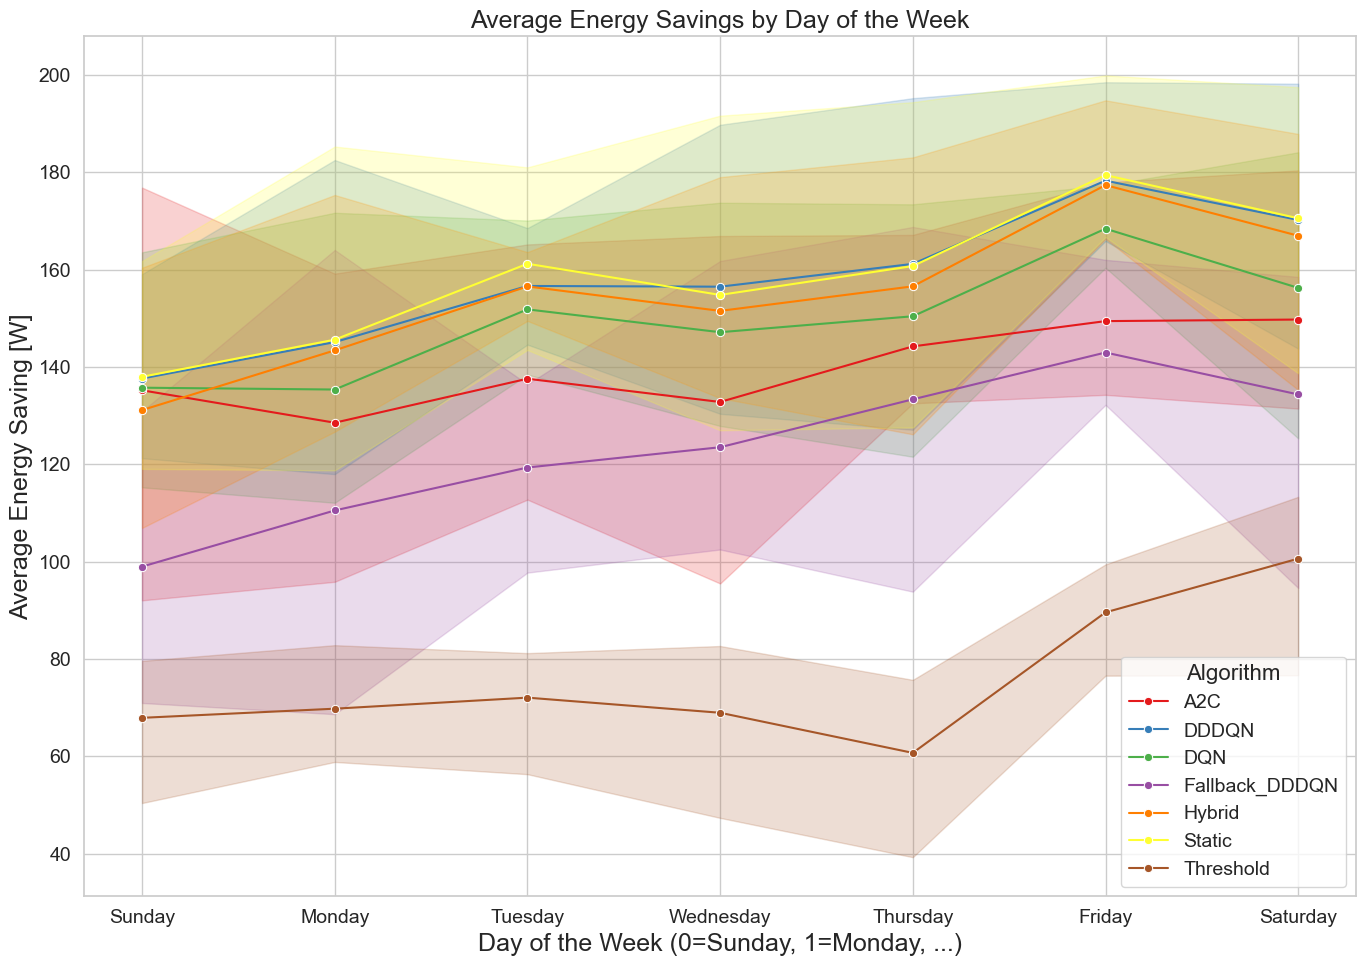

In [7]:

# Plotting Energy Savings by Day of the Week
plt.figure(figsize=(14, 10))
sns.lineplot(data=energy_savings, x='Day_of_Week', y='Avg_Energy_Saving', hue='Algorithm', marker='o', palette='Set1')
plt.title('Average Energy Savings by Day of the Week', fontsize=18)
plt.xlabel('Day of the Week (0=Sunday, 1=Monday, ...)', fontsize=18)
plt.ylabel('Average Energy Saving [W]', fontsize=18)
plt.xticks(ticks=np.arange(7), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Algorithm', fontsize=14, title_fontsize=16)
plt.tight_layout()
plt.show()



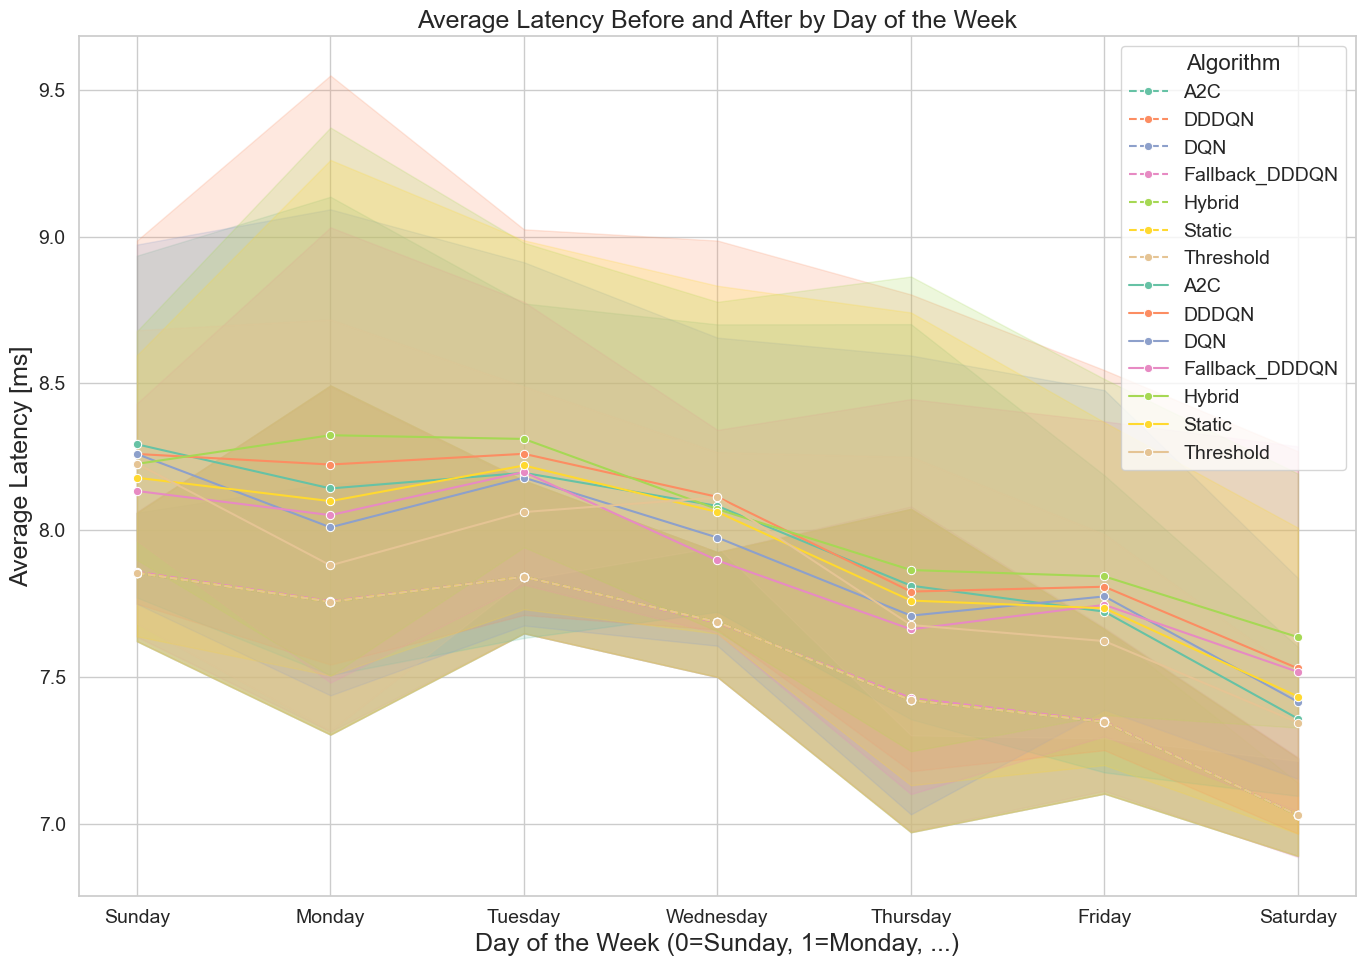

In [8]:
# Plotting Latency Impact by Day of the Week
plt.figure(figsize=(14, 10))
sns.lineplot(data=latency_data, x='Day_of_Week', y='Avg_Latency_Before', hue='Algorithm', marker='o', linestyle='--', palette='Set2')
sns.lineplot(data=latency_data, x='Day_of_Week', y='Avg_Latency_After', hue='Algorithm', marker='o', palette='Set2')
plt.title('Average Latency Before and After by Day of the Week', fontsize=18)
plt.xlabel('Day of the Week (0=Sunday, 1=Monday, ...)', fontsize=18)
plt.ylabel('Average Latency [ms]', fontsize=18)
plt.xticks(ticks=np.arange(7), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Algorithm', fontsize=14, title_fontsize=16, loc='upper right')
plt.tight_layout()
plt.show()


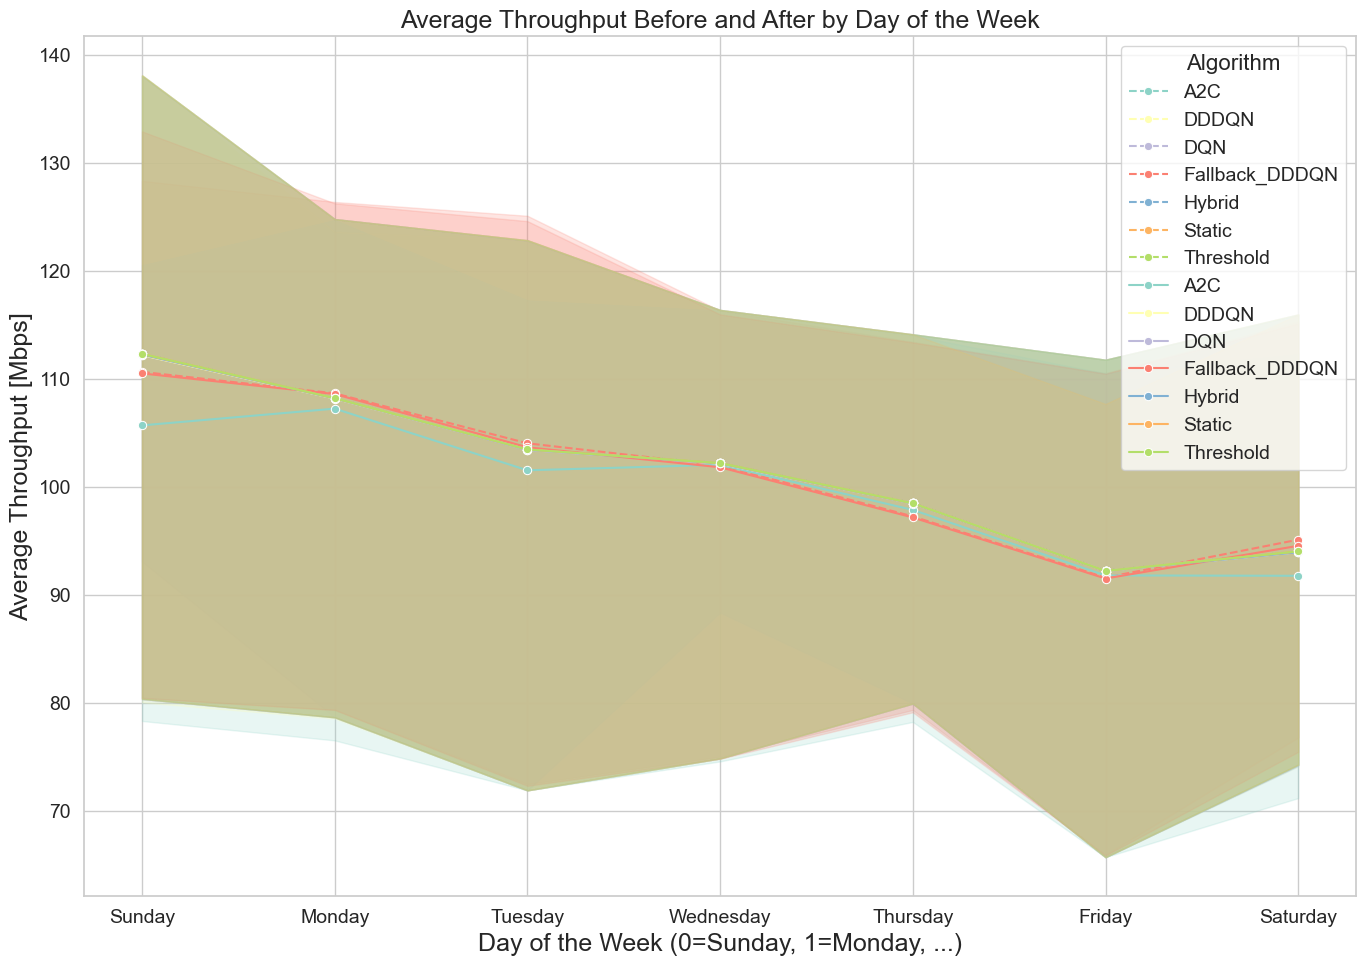

In [9]:
# Plotting Throughput by Day of the Week
plt.figure(figsize=(14, 10))
sns.lineplot(data=throughput_data, x='Day_of_Week', y='Avg_Throughput_Before', hue='Algorithm', marker='o', linestyle='--', palette='Set3')
sns.lineplot(data=throughput_data, x='Day_of_Week', y='Avg_Throughput_After', hue='Algorithm', marker='o', palette='Set3')
plt.title('Average Throughput Before and After by Day of the Week', fontsize=18)
plt.xlabel('Day of the Week (0=Sunday, 1=Monday, ...)', fontsize=18)
plt.ylabel('Average Throughput [Mbps]', fontsize=18)
plt.xticks(ticks=np.arange(7), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Algorithm', fontsize=14, title_fontsize=16, loc='upper right')
plt.tight_layout()
plt.show()

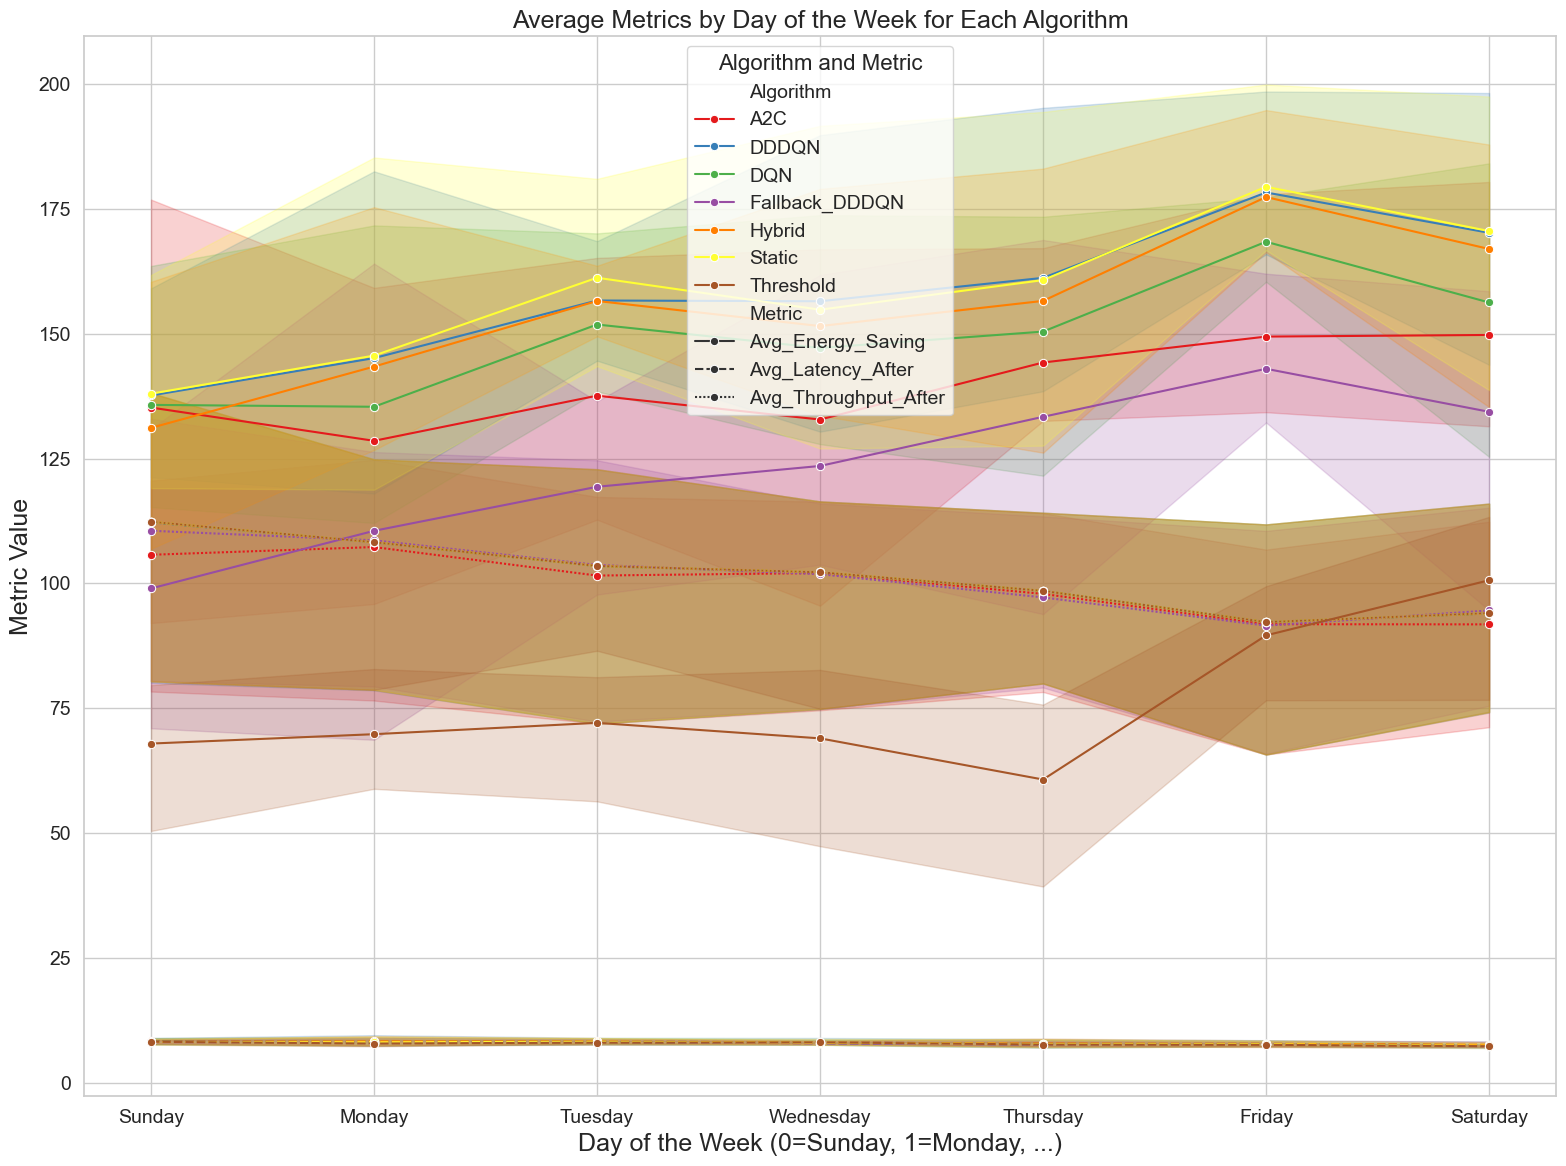

In [10]:
# Plotting Average Metrics by Day of the Week
overall_metrics_week = pd.DataFrame({
    'Algorithm': [],
    'Day_of_Week': [],
    'Avg_Energy_Saving': [],
    'Avg_Latency_After': [],
    'Avg_Throughput_After': []
})

for algorithm, file_path in files.items():
    df = pd.read_excel(file_path)
    if 'Avg_Energy_Saving' in df.columns and 'Avg_Latency_After' in df.columns and 'Avg_Throughput_After' in df.columns and 'Day_of_Week' in df.columns:
        avg_metrics = df[['Day_of_Week', 'Avg_Energy_Saving', 'Avg_Latency_After', 'Avg_Throughput_After']].copy()
        avg_metrics['Algorithm'] = algorithm
        overall_metrics_week = pd.concat([overall_metrics_week, avg_metrics], ignore_index=True)

overall_metrics_melted_week = overall_metrics_week.melt(id_vars=['Algorithm', 'Day_of_Week'], value_vars=['Avg_Energy_Saving', 'Avg_Latency_After', 'Avg_Throughput_After'], var_name='Metric', value_name='Value')
plt.figure(figsize=(16, 12))
sns.lineplot(data=overall_metrics_melted_week, x='Day_of_Week', y='Value', hue='Algorithm', style='Metric', marker='o', palette='Set1')
plt.title('Average Metrics by Day of the Week for Each Algorithm', fontsize=18)
plt.xlabel('Day of the Week (0=Sunday, 1=Monday, ...)', fontsize=18)
plt.ylabel('Metric Value', fontsize=18)
plt.xticks(ticks=np.arange(7), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Algorithm and Metric', fontsize=14, title_fontsize=16)
plt.tight_layout()
plt.show()
